# PART 1: Let's Explore our Data

Our data set contains one milion HTTP requests and an extra bit of information that tells us if that user clicked on a banner ad. Let's take a quick look.

In [1]:
!zcat data.json.gz | head -12

{
  "Accept": "*/*",
  "Accept-Encoding": "gzip, deflate",
  "User-Agent": "Mozilla/5.0 (Linux; Android 9; HTC_U-3u Build/PQ2A.190205.003; wv) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/86.0.4240.99 Mobile Safari/537.36 JsSdk/2 TopBuzz/12.7.0 NetType/4G",
  "Platform-User-Click": "0"
}
{
  "Accept": "*/*",
  "Accept-Encoding": "gzip, deflate",
  "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36",
  "Platform-User-Click": "0"
}

gzip: stdout: Broken pipe


Let's read its content into a Pandas DataFrame.

In [2]:
import json
import numpy as np
import pandas as pd
import gzip

final_json_list = []

with gzip.open('data.json.gz', 'r') as infile:
    
    # Variable for building our JSON block
    json_block = []

    for line in infile:
        
        myline = line.decode("utf-8")
        # Add the line to our JSON block
        json_block.append(myline)

        # Check whether we closed our JSON block
        if myline.startswith('}'):

            # Do something with the JSON dictionary
            json_dict = json.loads(''.join(json_block))
            final_json_list.append(json_dict)

            # Start a new block
            json_block = []


In [3]:
data = pd.DataFrame(final_json_list)

In [4]:
data.head(2)

,Accept,Accept-Encoding,User-Agent,Platform-User-Click,X-Ucbrowser-Ua,X-Wap-Profile,Dpr,Viewport-Width,Device-Stock-Ua,X-Operamini-Features,X-Operamini-Phone,X-Operamini-Phone-Ua
0,*/*,"gzip, deflate",Mozilla/5.0 (Linux; Android 9; HTC_U-3u Build/...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,*/*,"gzip, deflate",Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Spring cleaning to reduce the memory footprint as we don't need this object anymore
final_json_list=None

In [6]:
# List of columns

data.columns

Index(['Accept', 'Accept-Encoding', 'User-Agent', 'Platform-User-Click',
       'X-Ucbrowser-Ua', 'X-Wap-Profile', 'Dpr', 'Viewport-Width',
       'Device-Stock-Ua', 'X-Operamini-Features', 'X-Operamini-Phone',
       'X-Operamini-Phone-Ua'],
      dtype='object')

## Looking at overall description of the dataset

In [7]:
data.describe()

,Accept,Accept-Encoding,User-Agent,Platform-User-Click,X-Ucbrowser-Ua,X-Wap-Profile,Dpr,Viewport-Width,Device-Stock-Ua,X-Operamini-Features,X-Operamini-Phone,X-Operamini-Phone-Ua
count,991059,984846,999962,999962,13381,2066,6166,6166,12264,12279,12279,12279
unique,158,42,91003,2,1788,200,47,79,1234,12,14,1243
top,*/*,"gzip, deflate, br",Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0,dv(CPH1803);pr(UCBrowser/12.12.9.1226);ov(Andr...,http://wap.samsungmobile.com/uaprof/SM-G532G.xml,3,360,Mozilla/5.0 (Linux; Android 9; Redmi Note 8 Bu...,"advanced, camera, download, file_system, foldi...",Android #,Mozilla/5.0 (Linux; Android 9; Redmi Note 8 Bu...
freq,949373,589686,115685,987951,129,401,1729,3345,89,11345,11689,89


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999962 entries, 0 to 999961
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Accept                991059 non-null  object
 1   Accept-Encoding       984846 non-null  object
 2   User-Agent            999962 non-null  object
 3   Platform-User-Click   999962 non-null  object
 4   X-Ucbrowser-Ua        13381 non-null   object
 5   X-Wap-Profile         2066 non-null    object
 6   Dpr                   6166 non-null    object
 7   Viewport-Width        6166 non-null    object
 8   Device-Stock-Ua       12264 non-null   object
 9   X-Operamini-Features  12279 non-null   object
 10  X-Operamini-Phone     12279 non-null   object
 11  X-Operamini-Phone-Ua  12279 non-null   object
dtypes: object(12)
memory usage: 91.5+ MB


As we can see above that columns X-Ucbrowser-Ua, X-Wap-Profile, Dpr, Viewport-Width, Device-Stock-Ua, X-Operamini-Features, X-Operamini-Phone, X-Operamini-Phone-Ua have null in majority of values so not of much use

##### Let study the columns like Accept and Accept-Encoding 

In [9]:
data['Accept'].unique()[0:10]

array(['*/*',
       '*/*, dn/29071867172-d0d5a7bd,text/vnd.wap.wml;q=0.6,ss/1075x2114,UC/139',
       'text/html, application/xml;q=0.9, application/xhtml+xml, image/png, image/webp, image/jpeg, image/gif, image/x-xbitmap, */*;q=0.1',
       'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3',
       'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
       'application/javascript, */*;q=0.8', nan, '*/*,image/webp',
       'application/json, text/plain, */*',
       'application/signed-exchange;v=b3;q=0.9,*/*;q=0.8'], dtype=object)

In [10]:
data['Accept'].nunique()

158

Looking at the above column values we can see that these are of not much value as variance is negligible

In [11]:
data['Accept-Encoding'].unique()

array(['gzip, deflate', 'gzip,deflate', 'gzip, deflate, br',
       'gzip,deflate,sdch', 'br, gzip, deflate',
       'gzip, deflate, sdch, br', nan, 'gzip,deflate,br',
       'gzip, deflate, sdch', 'gzip, *;q=0.5', 'gzip', 'identity',
       'gzip, deflate, peerdist', 'gzip, deflate, lzma',
       'gzip, deflate, br, peerdist', 'GZIP', 'deflate, gzip', 'gzip, br',
       'gzip,deflate,identity', 'gzip, deflate, lzma, sdch',
       'gzip, deflate,', 'gzip, br, peerdist', 'none', 'gzip, peerdist',
       '', 'deflate, gzip, x-gzip, identity, *;q=0',
       'identity,gzip,deflate', 'gzip, deflate, lzma, sdch, br',
       'gzip, deflate, identity', 'gzi_, deflat_', 'deflate',
       'gzip, deflate, compress', 'gzip, identity',
       'gzip, UTF-8, deflate', 'gzip, deflate, sdch,',
       'gzip, deflate, br, deflate', 'br', 'gzip,deflate,peerdist',
       'gzip;q=1.0, x-gzip;q=0.9, x-bzip2;q=0.9, deflate;q=0.8, identity;q=0.5, base64;q=0.1, quoted-printable;q=0.1, compress;q=0, *;q=0',
    

Looking at the above column values this would also not be much of value to us while building the model

In [12]:
data['User-Agent'].unique()

array(['Mozilla/5.0 (Linux; Android 9; HTC_U-3u Build/PQ2A.190205.003; wv) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/86.0.4240.99 Mobile Safari/537.36 JsSdk/2 TopBuzz/12.7.0 NetType/4G',
       'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36',
       'UCWEB/2.0 (MIDP-2.0; U; Adr 9; en-US; Redmi_Note_7) U2/1.0.0 UCBrowser/10.7.9.856 U2/1.0.0 Mobile',
       ...,
       'Mozilla/5.0 (Linux; Android 9; BND-AL10 Build/HONORBND-AL10; rv) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Rocket/2.5.1(20460) Chrome/84.0.4147.89 Mobile Safari/537.36',
       'Mozilla/5.0 (iPhone; CPU iPhone OS 14_0 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148 [FBAN/FBIOS;FBAV/292.0.0.55.118;FBBV/250827541;FBDV/iPhone8,1;FBMD/iPhone;FBSN/iOS;FBSV/14.0;FBSS/2;FBID/phone;FBLC/zh_TW;FBOP/5;FBRV/0]',
       'Mozilla/5.0 (Linux; Android 8.1.0; 8082 Build/O11019) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/

In [13]:
data['User-Agent'].nunique()

91003

### User agent column has lot of valuable information but it really requires almost infinite effort to extract some structured information out of this but for sure this contains lot of valuable information like device make, OS

Lets study the target variable in the dataset and as we can see it is highly imbalanced dataset

In [14]:
data['Platform-User-Click'].value_counts()

0    987951
1     12011
Name: Platform-User-Click, dtype: int64

In [15]:
#Lets install seaborn and matplotlib library

# !pip install matplotlib
# !pip install seaborn==0.11

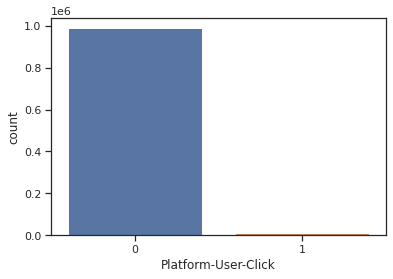

In [16]:
import seaborn as sns
sns.set(style="ticks")
ax = sns.countplot(x="Platform-User-Click", data=data)

In [17]:
data.head(3)

,Accept,Accept-Encoding,User-Agent,Platform-User-Click,X-Ucbrowser-Ua,X-Wap-Profile,Dpr,Viewport-Width,Device-Stock-Ua,X-Operamini-Features,X-Operamini-Phone,X-Operamini-Phone-Ua
0,*/*,"gzip, deflate",Mozilla/5.0 (Linux; Android 9; HTC_U-3u Build/...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,*/*,"gzip, deflate",Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"*/*, dn/29071867172-d0d5a7bd,text/vnd.wap.wml;...","gzip,deflate",UCWEB/2.0 (MIDP-2.0; U; Adr 9; en-US; Redmi_No...,0,pf(Linux);la(en-US);re(U2/1.0.0);dv(Redmi_Note...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We would like to use a couple of standard ML/IA techniquest to verify that there is not much correlation between
UA strings and users’ decision to click. 

**The User-Agent string is only the most informative column available but cardinality is very high so it will be very expensive to train the model and training data will also be very sparse**.

For this reason, we are going to augment our dataset with additional device data with the WURFL API. This is what we are going to show you in the next notebook, but first let's save our dataset to a `.tsv.gz` file that we can more easily manage. We will use it as input to our next notebook.

In [18]:
data["User-Agent"] = data["User-Agent"].astype(str)

In [19]:
import csv

data.to_csv("data_in_tsv_format.tsv.gz", sep="\t", quoting=csv.QUOTE_NONE, compression='gzip')

In [20]:
!ls -la data_in_*

-rwxrwxrwx 1 passani passani 15479307 Jan 24 21:52 data_in_tsv_format.tsv.gz


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999962 entries, 0 to 999961
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Accept                991059 non-null  object
 1   Accept-Encoding       984846 non-null  object
 2   User-Agent            999962 non-null  object
 3   Platform-User-Click   999962 non-null  object
 4   X-Ucbrowser-Ua        13381 non-null   object
 5   X-Wap-Profile         2066 non-null    object
 6   Dpr                   6166 non-null    object
 7   Viewport-Width        6166 non-null    object
 8   Device-Stock-Ua       12264 non-null   object
 9   X-Operamini-Features  12279 non-null   object
 10  X-Operamini-Phone     12279 non-null   object
 11  X-Operamini-Phone-Ua  12279 non-null   object
dtypes: object(12)
memory usage: 91.5+ MB


In [22]:
data[(data["User-Agent"].isnull())]

,Accept,Accept-Encoding,User-Agent,Platform-User-Click,X-Ucbrowser-Ua,X-Wap-Profile,Dpr,Viewport-Width,Device-Stock-Ua,X-Operamini-Features,X-Operamini-Phone,X-Operamini-Phone-Ua


In [23]:
data.loc[24112]

Accept                            */*
Accept-Encoding         gzip, deflate
User-Agent                           
Platform-User-Click                 0
X-Ucbrowser-Ua                    NaN
X-Wap-Profile                     NaN
Dpr                               NaN
Viewport-Width                    NaN
Device-Stock-Ua                   NaN
X-Operamini-Features              NaN
X-Operamini-Phone                 NaN
X-Operamini-Phone-Ua              NaN
Name: 24112, dtype: object